In [1]:
# unit test
import unittest

from PIL import Image, ImageDraw

import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

import math

# "helper" needs to be part of sys path
import sys
sys.path.insert(0, "helper")
sys.path.insert(0, "/helper")
sys.path.insert(0, "./helper")
sys.path.insert(0, "../helper")
print(sys.path)

%load_ext autoreload
%autoreload 2

# own module
from dataset.mean_teacher import MeanTeacherTrainDataset, MeanTeacherValDataset

['../helper', './helper', '/helper', 'helper', 'C:\\Users\\Prinzessin\\projects\\decentnet\\datasceyence\\examples', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\python39.zip', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\DLLs', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta', '', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Prinzessin\\.ipython']


In [26]:
class UnitTestLoss(unittest.TestCase):

    def test_item_labelled(self):
        
        #csv_filenames = ["../data_prep/mt_data_ichallenge_unlabelled.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_non_amd.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_amd.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_glaucoma.csv"]
        csv_filenames = ["../data_prep/mt_data_ichallenge_unlabelled.csv", "../data_prep/mt_data_ichallenge_non_amd.csv", "../data_prep/mt_data_ichallenge_glaucoma.csv"]
        
        mtd = MeanTeacherTrainDataset(mode="train", image_size=500, csv_filenames=csv_filenames)
        item = mtd.__getitem__(index=500)
        print("item")
        print(item)
    
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax2.set_title('Labelled')
        ax1.imshow(item["img"].permute(1, 2, 0), cmap="gray")
        ax2.imshow(item["msk"].permute(1, 2, 0), cmap="gray")
        

        #print("Checks")
        #print(torch.sum(torch.isnan(item["msk"])))
        #print(torch.isnan(item["msk"]))
        #print(item["msk"] != item["msk"]) # math.nan
        #print(item["msk"])
        
    def test_item_unlabelled(self):
        
        #csv_filenames = ["../data_prep/mt_data_ichallenge_unlabelled.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_non_amd.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_amd.csv"] 
        #csv_filenames = ["../data_prep/mt_data_ichallenge_glaucoma.csv"]
        csv_filenames = ["../data_prep/mt_data_ichallenge_unlabelled.csv", "../data_prep/mt_data_ichallenge_non_amd.csv", "../data_prep/mt_data_ichallenge_glaucoma.csv"]
        
        mtd = MeanTeacherTrainDataset(mode="train", image_size=500, csv_filenames=csv_filenames)
        item = mtd.__getitem__(index=300)
        print("item")
        print(item)
    
        fig, (ax1, ax2) = plt.subplots(1, 2)
        
        ax2.set_title('Unlabelled')
        ax1.imshow(item["img"].permute(1, 2, 0), cmap="gray")
        ax2.imshow(item["msk"].permute(1, 2, 0), cmap="gray")
        
        #print("Checks")
        #print(torch.sum(torch.isnan(item["msk"])))
        #print(torch.isnan(item["msk"]))
        #print(item["msk"] != item["msk"]) # math.nan
        #print(item["msk"])

.

item
{'img': tensor([[[0.0132, 0.0132, 0.0132,  ..., 0.0132, 0.0132, 0.0132],
         [0.0132, 0.0132, 0.0132,  ..., 0.0132, 0.0132, 0.0132],
         [0.0132, 0.0132, 0.0132,  ..., 0.0132, 0.0132, 0.0132],
         ...,
         [0.0132, 0.0132, 0.0132,  ..., 0.0132, 0.0132, 0.0132],
         [0.0132, 0.0132, 0.0132,  ..., 0.0132, 0.0132, 0.0132],
         [0.0132, 0.0132, 0.0132,  ..., 0.0132, 0.0132, 0.0132]]]), 'msk': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 'weight': 0.1, 'mbs_class': 2, 'has_mask': True}


.
----------------------------------------------------------------------
Ran 2 tests in 0.436s

OK


item
{'img': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 'msk': tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 'weight': 0.0, 'mbs_class': 0, 'has_mask': False}


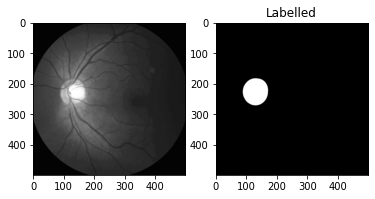

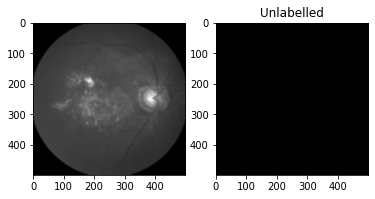

In [27]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)